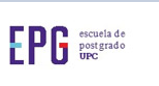

### **MODELOS GRAFICOS PROBABILISTICOS - Trabajo Final**

---



**Grupo - 5: Nombres / Apellidos:**
- Freddy Benjamin / Chilón Vargas.
- Jose Felix, Enriquez Paniura.
- Hans Aurelio, Garibaldi Bravo.
- Fidel Antonio, Infante Angeles.
- Johnny Rogger, Zapana Chura.



---



## **Modelo de Vida Saludable**

A partir de el siguiente conjunto de datos se debe crear un Modelo Grafico Probabilístico (MGP) que represente el **La dieta recomendada** de una persona a fin de conocer la asociación entre los rasgos y/o atributos de diferentes características que puedan afectar a una vida saludable.

El modelo esta compuesto por:


- **Weight:** (0 - de 35 a 40 kg, 1 - de 40 a 55 kg, 2 - de 55 -70, 3 - de 70 a 85 kg, 4 - de 85 a 100, 5 - de 100 a más)

- **Stature:** (0 - de  1.40 a 1.60 m, 1: de 1.61 a 1.80 m, 2: de 1.81 a 2.0 m., 3: de 2.1 a más)

- **Age:** (0 - de 12 a 18 años (adolescencia), 1 - de 18 a 26 años(Juventud), 2 - de 26 a 60(Adultez), 3 - de 60 a más(Persona Mayor))

- **Gender:** (0 - femenino, 1 - masculino)

- **Waist measurement:** Medida de la cintura(0 - de 0 a 70 cm, 1 - de 0.71 a 0.8 cm, 2 - de 0.81 a 0.9 cm, 3 - de 0.91 a 1.0, 4 - de 1.1 a más)

- **% fat man:** % de grasa (0 - de 2 a 5% en hombres y 10 a 13% en mujeres(Grasa esencial), 1 - de 6 a 13% en hombres y 14 a 20% en mujeres(Atleta), 2 - de 14 a 17% en hombres y de 21 a 24% en mujeres(Fitness), 3 - de 18 a 24% en hombres y de 25 a 31% en mujeres(Aceptable), 4 - de 25% a más en hombres y de 32% a más en mujeres(Obesidad))

- **IMC:** Esta medida se calcula en base al peso y la estatura de un individuo (0 - de 0 a 18.5(Por debajo), 1 - 18.6 a 24.9(Saludable), 2 - 25 - 29.9(Sobrepeso), 3 - 30 a 34.9(Obesidad I), 4 - 35 a 39.9(Obesidad II), 5 - 40 a más(Obesidad III))

- **Pathology:** (0 - Leche y lácteos, 1 - Carnes y grasas, 2 - Cereales, 3 - Frutas, 4 - Bebidas azucaradas, 5 - Grasas)

- **Diet:**	(0 - Bajas en carbohidratos,1 - Bajas en grasas, 2 - Bajas en calorías, 3 - Vegetariana, 4 - Protéica)

- **Exercise:**	(0 - Aeróbico, 1 - Fuerza o resistencia, 2 - Flexibilidad)

### **0.  Librerias necesarias**

In [37]:
# Incluir / instalar las librerias necesarias para carga de datos, pre procesamiento, representacion, inferencia y aprendizaje de MGP
!pip install pgmpy

import pandas as pd
import numpy as np
import warnings
import networkx as nx
from pgmpy.estimators import TreeSearch
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score

warnings.simplefilter('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **1. Pre procesamiento de los datos**

El dataset debe ajustarse a los datos que se brindan en el inicio

In [38]:
#Cargar Dataset
df = pd.read_csv('DB_FINAL_ULTIMO_CON_DIETA.csv')

df.head(5)

,usuario_id,Nombre,Sexo,Edad,Talla (m),Peso (kg),IMC,P_grasa (%),Cintura (cm),Ejercicio,Patologia,Dieta
0,36,Nictza,F,41,1.70,64.2,22.2,0.39,81.5,Resistencia,Carnes grasas,Vegetariana
1,137,Carla,F,50,1.70,88.1,30.5,0.32,103.7,Aeróbico,Frutas,Vegetariana
2,141,Jhonatan,M,38,1.75,57.5,18.8,0.42,84.5,Aeróbico,Leche y lácteos,Protéica
3,190,Carmen,F,46,1.59,62.5,24.7,0.46,83.0,Resistencia,Frutas,Bajas en carbohidratos
4,226,Romina,F,26,1.70,67.4,23.3,0.42,79.0,Resistencia,Frutas,Bajas en calorías


In [39]:
#Verificar si hay nulos y/ o datos faltantes
df.isnull().sum(axis=0)

usuario_id      0
Nombre          0
Sexo            0
Edad            0
Talla (m)       0
Peso (kg)       0
IMC             0
P_grasa (%)     0
Cintura (cm)    0
Ejercicio       0
Patologia       0
Dieta           0
dtype: int64

In [40]:
df.dtypes

usuario_id        int64
Nombre           object
Sexo             object
Edad              int64
Talla (m)       float64
Peso (kg)       float64
IMC             float64
P_grasa (%)     float64
Cintura (cm)    float64
Ejercicio        object
Patologia        object
Dieta            object
dtype: object

In [41]:
# Eliminamos las columna de ids y nombres
df = df.iloc[:,2:]
df.head(5)

,Sexo,Edad,Talla (m),Peso (kg),IMC,P_grasa (%),Cintura (cm),Ejercicio,Patologia,Dieta
0,F,41,1.70,64.2,22.2,0.39,81.5,Resistencia,Carnes grasas,Vegetariana
1,F,50,1.70,88.1,30.5,0.32,103.7,Aeróbico,Frutas,Vegetariana
2,M,38,1.75,57.5,18.8,0.42,84.5,Aeróbico,Leche y lácteos,Protéica
3,F,46,1.59,62.5,24.7,0.46,83.0,Resistencia,Frutas,Bajas en carbohidratos
4,F,26,1.70,67.4,23.3,0.42,79.0,Resistencia,Frutas,Bajas en calorías


In [42]:
# Convertir columnas numericas y/o a categoricas numericas

def chooseGender(gender):
    if (gender == 'F'):
        return 0
    else:
        return 1

def chooseAge(age):
    if (age >= 0 and age < 12):
        return 0
    elif (age >= 12 and age < 18):
        return 1
    elif (age >= 18 and age < 26):
        return 2
    elif (age >= 26 and age < 60):
        return 3
    elif (age >=60):
        return 4

def chooseStature(stature):
    if (stature >= 1.40 and stature <= 1.60):
        return 0
    elif (stature >= 1.61 and stature <= 1.80):
        return 1
    elif (stature >= 1.81 and stature <= 2.0):
        return 2
    elif (stature >= 2.1):
        return 3

def chooseWeight(weight):
    if (weight >= 0 and weight < 40):
        return 0
    elif (weight >= 40 and weight < 55):
        return 1
    elif (weight >= 55 and weight < 70):
        return 2
    elif (weight >= 70 and weight < 85):
        return 3
    elif (weight >= 85 and weight < 100):
        return 4
    elif (weight >= 100):
        return 5

def chooseIMC(imc):
    if (imc >= 0 and imc <= 18.5):
        return 0
    elif (imc >= 18.6 and imc <= 24.9):
        return 1
    elif (imc >= 25.0 and imc <= 29.9):
        return 2
    elif (imc >= 30.0 and imc <= 34.9):
        return 3
    elif (imc >= 35.0 and imc <= 39.9):
        return 4
    elif (imc >= 40.0):
        return 5

def choosePercentFat(percent_fat, gender):
    if(gender == 1):
        if (percent_fat >= 0.2 and percent_fat < 0.6):
            return 0
        elif (percent_fat >= 0.6 and percent_fat < 0.14):
            return 1
        elif (percent_fat >= 0.14 and percent_fat < 0.18):
            return 2
        elif (percent_fat >= 0.18 and percent_fat < 0.25):
            return 3
        elif (percent_fat >= 0.25):
            return 4
    else:
        if (percent_fat >= 0.10 and percent_fat < 0.14):
            return 0
        elif (percent_fat >= 0.14 and percent_fat < 0.21):
            return 1
        elif (percent_fat >= 0.21 and percent_fat < 0.25):
            return 2
        elif (percent_fat >= 0.25 and percent_fat < 0.32):
            return 3
        elif (percent_fat >= 0.32):
            return 4

def chooseWaistMeasurement(waist_measurement):
    if (waist_measurement >= 0 and waist_measurement <= 0.70):
        return 0
    elif (waist_measurement >= 0.71 and waist_measurement <= 0.8):
        return 1
    elif (waist_measurement >= 0.81 and waist_measurement <= 0.9):
        return 2
    elif (waist_measurement >= 0.91 and waist_measurement <= 1.0):
        return 3
    elif (waist_measurement > 1.1):
        return 4

def chooseExercise(exercise):
    if (exercise == 'Aeróbico'):
        return 0
    elif (exercise == 'Resistencia'):
        return 1
    elif (exercise == 'Flexibilidad'):
        return 2

def choosePathology(pathology):
    if (pathology == 'Leche y lácteos'):
        return 0
    elif (pathology == 'Carnes grasas'):
        return 1
    elif (pathology == 'Cereales'):
        return 2
    elif (pathology == 'Frutas'):
        return 3
    elif (pathology == 'Bebidas azucaradas'):
        return 4
    elif (pathology == 'Grasas'):
        return 5
    else:
        return 6

def chooseDiet(diet):
    if (diet == 'Bajas en carbohidratos'):
        return 0
    elif (diet == 'Bajas en grasas'):
        return 1
    elif (diet == 'Bajas en calorías'):
        return 2
    elif (diet == 'Vegetariana'):
        return 3
    elif (diet == 'Protéica'):
        return 4


df['Sexo'] = df['Sexo'].map(lambda x : chooseGender(x))
df['Edad'] =  df['Edad'].map(lambda x : chooseAge(x))
df['Talla (m)'] =  df['Talla (m)'].map(lambda x : chooseStature(x))
df['Peso (kg)'] =  df['Peso (kg)'].map(lambda x : chooseWeight(x))
df['IMC'] =  df['IMC'].map(lambda x : chooseIMC(x))
df['P_grasa (%)'] =  df.apply(lambda x : choosePercentFat(x['P_grasa (%)'], x['Sexo']), axis=1)
df['Cintura (cm)'] =  df['Cintura (cm)'].map(lambda x : chooseWaistMeasurement(x))
df['Ejercicio'] =  df['Ejercicio'].map(lambda x : chooseExercise(x))
df['Patologia'] =  df['Patologia'].map(lambda x : choosePathology(x))
df['Dieta'] =  df['Dieta'].map(lambda x : chooseDiet(x))
df

,Sexo,Edad,Talla (m),Peso (kg),IMC,P_grasa (%),Cintura (cm),Ejercicio,Patologia,Dieta
0,0,3,1,2,1,4,4,1,1,3
1,0,3,1,4,3,4,4,0,3,3
2,1,3,1,2,1,0,4,0,0,4
3,0,3,0,2,1,4,4,1,3,0
4,0,3,1,2,1,4,4,1,3,2
...,...,...,...,...,...,...,...,...,...,...
283,0,3,1,3,2,4,4,0,6,4
284,1,3,1,2,1,0,4,0,6,0
285,0,3,0,3,3,4,4,0,6,2
286,0,3,1,4,2,4,4,0,0,4


In [43]:
df.isnull().sum(axis=0)

Sexo            0
Edad            0
Talla (m)       0
Peso (kg)       0
IMC             0
P_grasa (%)     0
Cintura (cm)    0
Ejercicio       0
Patologia       0
Dieta           0
dtype: int64

#### **(2) Crear y Visualizar el DAG y los CPDs**

Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

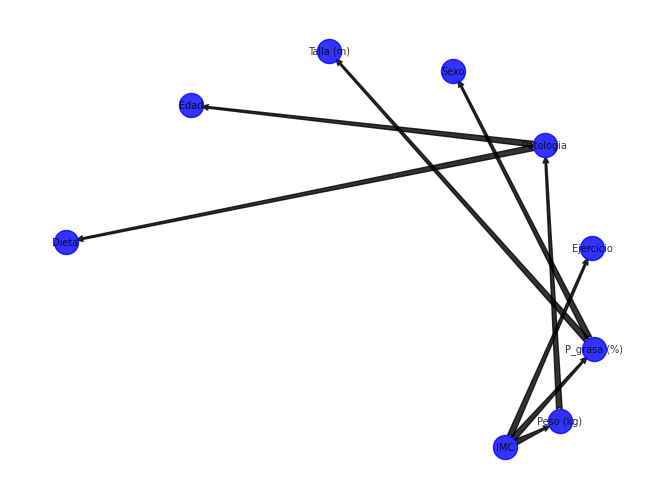

In [44]:
data = df.copy()
est = TreeSearch(data, root_node='IMC')
dag = est.estimate(estimator_type='chow-liu')
pos = nx.spiral_layout(dag)
nx.draw(dag, pos=pos, with_labels=True,node_color='b', font_size=7, arrowstyle='fancy', alpha=0.8)

In [45]:
model = BayesianNetwork(dag)
model.fit(data)
model.get_cpds()

[<TabularCPD representing P(IMC:6) at 0x7f46d2cadf90>,
 <TabularCPD representing P(Peso (kg):5 | IMC:6) at 0x7f46d2cae680>,
 <TabularCPD representing P(P_grasa (%):5 | IMC:6) at 0x7f46d2cafa60>,
 <TabularCPD representing P(Ejercicio:3 | IMC:6) at 0x7f46d2cad150>,
 <TabularCPD representing P(Patologia:6 | Peso (kg):5) at 0x7f46d2caf190>,
 <TabularCPD representing P(Sexo:2 | P_grasa (%):5) at 0x7f46d2cae710>,
 <TabularCPD representing P(Talla (m):3 | P_grasa (%):5) at 0x7f46d2cacca0>,
 <TabularCPD representing P(Edad:5 | Patologia:6) at 0x7f46d2caefe0>,
 <TabularCPD representing P(Dieta:5 | Patologia:6) at 0x7f46d2caceb0>]

#### **(3) Resolver Inferencias**

Se hará uso de **Eliminacion de la Variable**, para la resolución de las inferencias.

- ¿Cuál es la distribución condicional del Riesgo dado que conocemos el género del cliente que solicita el crédito?

In [46]:
infer = VariableElimination(model)
infer

#### ¿Cuál es la probabilidad de que a una mujer adulto mayor se le recomiende hacer ejercicios de resistencia?

In [70]:
inference = infer.query(variables=['Ejercicio'], evidence={'Sexo': 0, 'Edad': 4 })
print(inference)

+--------------+------------------+
| Ejercicio    |   phi(Ejercicio) |
+==============+==================+
| Ejercicio(0) |           0.8999 |
+--------------+------------------+
| Ejercicio(1) |           0.0969 |
+--------------+------------------+
| Ejercicio(2) |           0.0032 |
+--------------+------------------+


In [71]:
print(f'Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de { round(inference.values[1] * 100, 2) } %')

Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de 9.69 %


#### ¿Cuál es la probabilidad de tener un porcentaje de grasa alto(Obesidad), a pesar de tener una rutina de ejercicio aeróbico?

In [67]:
inference = infer.query(variables=['P_grasa (%)'], evidence = {'Ejercicio': 0})
print(inference)

+----------------+--------------------+
| P_grasa (%)    |   phi(P_grasa (%)) |
+================+====================+
| P_grasa (%)(0) |             0.1808 |
+----------------+--------------------+
| P_grasa (%)(1) |             0.0205 |
+----------------+--------------------+
| P_grasa (%)(2) |             0.0177 |
+----------------+--------------------+
| P_grasa (%)(3) |             0.1046 |
+----------------+--------------------+
| P_grasa (%)(4) |             0.6764 |
+----------------+--------------------+


In [69]:
print(f'Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de { round(inference.values[4] * 100, 2) } %')

Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de 67.64 %


#### ¿Cuál es la probabilidad de tener obesidad tipo II (IMC) si llevo una dieta vegetariana?

In [61]:
inference = infer.query(variables=['IMC'], evidence = {'Dieta': 3})
print(inference)

+--------+------------+
| IMC    |   phi(IMC) |
+========+============+
| IMC(0) |     0.0167 |
+--------+------------+
| IMC(1) |     0.3238 |
+--------+------------+
| IMC(2) |     0.2843 |
+--------+------------+
| IMC(3) |     0.2269 |
+--------+------------+
| IMC(4) |     0.0904 |
+--------+------------+
| IMC(5) |     0.0579 |
+--------+------------+


In [62]:
print(f'Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de { round(inference.values[4] * 100, 2) } %')

Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de 9.04 %


#### ¿Cuál es la probabilidad de recomendarle una dieta vegetariana a una persona de sexo femenino con un imc de 32?

In [64]:
inference = infer.query(variables=['Dieta'], evidence = {'Sexo': 0, 'IMC': 3})
print(inference)

+----------+--------------+
| Dieta    |   phi(Dieta) |
+==========+==============+
| Dieta(0) |       0.1733 |
+----------+--------------+
| Dieta(1) |       0.2195 |
+----------+--------------+
| Dieta(2) |       0.2100 |
+----------+--------------+
| Dieta(3) |       0.2128 |
+----------+--------------+
| Dieta(4) |       0.1844 |
+----------+--------------+


In [66]:
print(f'Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de { round(inference.values[3] * 100, 2) } %')

Respuesta: La probabilidad de que un adulto mayor haga ejercicios de resistencia es de 21.28 %
